In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
import os
from PIL import Image

In [3]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

NameError: name 'img_height' is not defined

In [52]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random
import numpy as np

# Specify the path to your dataset directory
dataset_directory = "C:/Users/weesh/dsa4262-project/data/archive/train"

# Define the augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Iterate through each class directory in your dataset
for class_folder in os.listdir(dataset_directory):
    class_path = os.path.join(dataset_directory, class_folder)
    
    # Count the number of samples in this class
    num_samples = len(os.listdir(class_path))
    
    # Calculate the number of augmentations needed to balance the class
    augmentations_needed = 1500 - num_samples  # max_samples is the desired number of samples per class
    
    if augmentations_needed > 0:
        # Use data augmentation to generate additional samples for this class
        class_images = [os.path.join(class_path, image_file) for image_file in os.listdir(class_path)]
        
        for i in range(augmentations_needed):
            # Randomly select an image from the class
            img_path = random.choice(class_images)
            
            # Load and convert the image to a NumPy array
            img = Image.open(img_path)
            img = np.array(img)
            
            # Apply data augmentation
            augmented_img = datagen.random_transform(img)
            
            # Convert the NumPy array back to an image
            augmented_img = Image.fromarray(augmented_img)
            
            # Save the augmented image to the class folder
            augmented_img.save(os.path.join(class_path, f"augmented_{i}.jpg"))

In [3]:
# Specify the path to your image dataset directory
local_data_dir = "C:/Users/weesh/dsa4262-project/data/suggested/train"
local_data_dir1 = "C:/Users/weesh/dsa4262-project/data/archive/test"
import pathlib

# Use pathlib to list the files in the directory
data_dir = pathlib.Path(local_data_dir)
test_dir = pathlib.Path(local_data_dir1)

In [4]:
batch_size = 64
img_height = 180
img_width = 180

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir, 
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6000 files belonging to 4 classes.
Using 4800 files for training.


In [6]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir, 
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6000 files belonging to 4 classes.
Using 1200 files for validation.


In [7]:
class_names = train_ds.class_names
print(class_names)

['Atopic Dermatitis Photos', 'Lupus and other Connective Tissue diseases', 'Scabies Lyme Disease and other Infestations and Bites', 'Seborrheic Keratoses and other Benign Tumors']


In [8]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [9]:
normalization_layer = layers.Rescaling(1./255)

In [10]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.9168458


In [26]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [25]:
from tensorflow.keras.regularizers import l2

num_classes = len(class_names)
model = keras.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(32, 3, padding = 'same', activation='relu',kernel_regularizer=l2(0.01)),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu', kernel_regularizer=l2(0.01)),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu', kernel_regularizer=l2(0.01)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    layers.Dense(num_classes)
])

In [19]:
# best model - try with 0.3 drop out rates with 70 epochs to see how it goes.  
from tensorflow.keras.regularizers import l2

num_classes = len(class_names)
model = keras.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding = 'same', activation='relu',kernel_regularizer=l2(0.01)),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu', kernel_regularizer=l2(0.01)),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu', kernel_regularizer=l2(0.01)),
    layers.MaxPooling2D(),
    layers.Dropout(0.4),
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    layers.Dense(num_classes)
])

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
75/75 [==============================] - 37s 479ms/step - loss: 2.2047 - accuracy: 0.3152 - val_loss: 1.6129 - val_accuracy: 0.3825
Epoch 2/20
75/75 [==============================] - 36s 482ms/step - loss: 1.5361 - accuracy: 0.3738 - val_loss: 1.4710 - val_accuracy: 0.3792
Epoch 3/20
75/75 [==============================] - 36s 476ms/step - loss: 1.4576 - accuracy: 0.4033 - val_loss: 1.4527 - val_accuracy: 0.3567
Epoch 4/20
75/75 [==============================] - 35s 473ms/step - loss: 1.4103 - accuracy: 0.4175 - val_loss: 1.3873 - val_accuracy: 0.4133
Epoch 5/20
75/75 [==============================] - 36s 478ms/step - loss: 1.3717 - accuracy: 0.4415 - val_loss: 1.3631 - val_accuracy: 0.4283
Epoch 6/20
75/75 [==============================] - 36s 478ms/step - loss: 1.3520 - accuracy: 0.4425 - val_loss: 1.3412 - val_accuracy: 0.4258
Epoch 7/20
75/75 [==============================] - 36s 478ms/step - loss: 1.3541 - accuracy: 0.4292 - val_loss: 1.3381 - val_accuracy: 0.4267

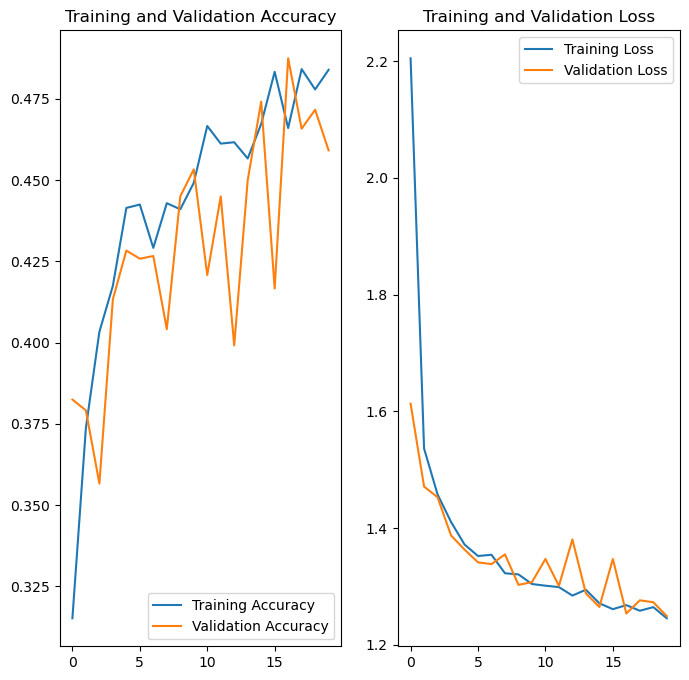

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

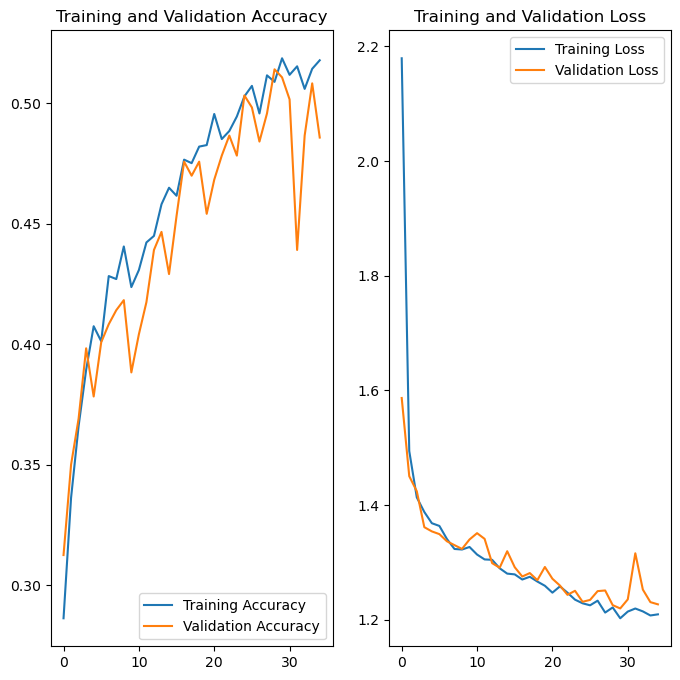

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()